## Problem Statement: 
This project is focused on leveraging Python for time series prediction of household 
electricity consumption. The dataset includes essential features such as date, time, global active 
power, global reactive power, voltage, global intensity, and sub-metering values. 

The objective is to build robust time series forecasting models that can accurately predict future electricity 
consumption trends based on historical data. The insights derived from this analysis can empower 
households to optimize energy usage, plan efficiently, and contribute to sustainable energy 
practices.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#load data

df = pd.read_csv(r'household_power_consumption.txt' , delimiter=';',
                 dtype={'Global_active_power': float, 'Global_reactive_power': 
                        float, 'Voltage': float, 'Global_intensity': float, 
                        'Sub_metering_1': float, 'Sub_metering_2': float, 
                        'Sub_metering_3': float},
                 na_values=['?'])

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### Convert Date and Time columns to datetime

In [3]:

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],  dayfirst=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [5]:
df.shape

(2075259, 8)

In [4]:
!pip install skimpy

   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   -----------------

In [5]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 2075259 │ │ float64     │ 7     │                                                         │
│ │ Number of columns │ 9       │ │ string      │ 2     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA     ┃ NA %  ┃ mean  ┃ sd    ┃ p0     ┃ p25    ┃ p50  ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Global_active_power      │  25979 │  1.25 │   1.1 │   1.1 │  0.076 │   0.31 │  0.6 │   1.5 │   11 │   ▇▁   │  │
│ │ Global_reactive_power    │  25979 │  1.25 │  0.12 │  0.11 │      0 │  0.048 │  0.1 │  0.19 │  1.4 │   ▇▁   │  │
│ │ Voltage                  │  25979 │  1.25 │   240 │   3.2 │    220 │    240 │  240 │   240 │  250 │   ▃▇▂  │  │
│ │ Global_intensity         │  25979 │  1.25 │   4.6 │   4.4 │    0.2 │    1.4 │  2.6 │   6.4 │   48 │   ▇▁   │  │
│ │ Sub_metering_1           │  25979 │  1.25 │   1.1 │   6.2 │      0 │      0 │    0 │     0 │   88 │   ▇    │  │
│ │ Sub_metering_2           │  25979 │  1.25 │   1.3 │   5.8 │      0 │      0 │    0 │     1 │   80 │   ▇    │  │
│ │ Sub_metering_3           │  25979 │  1.25 │   6.5 │   8.4 │      0 │      0 │    1 │    17 │   31 │  ▇  ▃  │  │
│ └──────────────────────────┴────────┴───────┴───────┴───────┴────────┴────────┴──────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                      │       0 │          0 │                            1 │                  2075259 │  │
│ │ Time                      │       0 │          0 │                            1 │                  2075259 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Insights

**Missing Values:** Each numerical feature has 25,979 missing values, which is about 1.25% of the total data.

In [6]:
# setting datetime as my index

df.set_index('Datetime', inplace=True)

In [7]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


### Downsampling a DataFrame from minute-level to hourly averages

In [8]:
df_downsampled = df.resample('H').mean()

In [9]:
df_downsampled

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


## checking percentage of null values

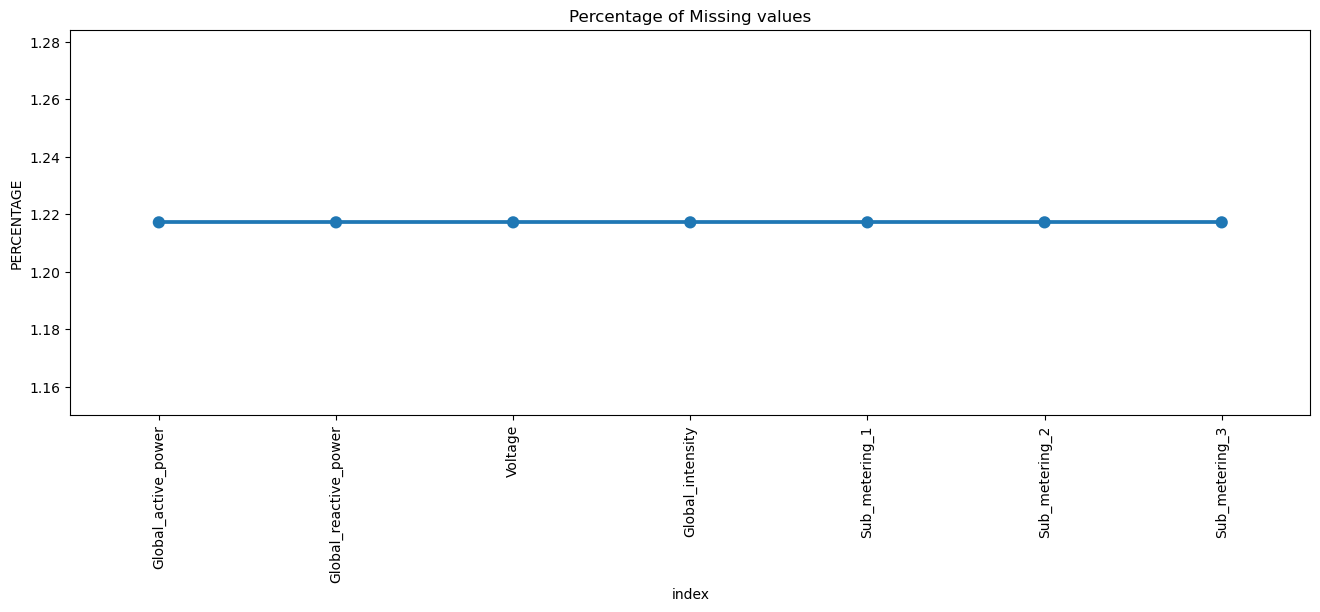

In [10]:
missing = pd.DataFrame((df_downsampled.isnull().sum()) * 100 / df_downsampled.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [11]:
#Fill null values

df_downsampled_cleaned = df_downsampled.bfill()


#### confirm if null values are removed

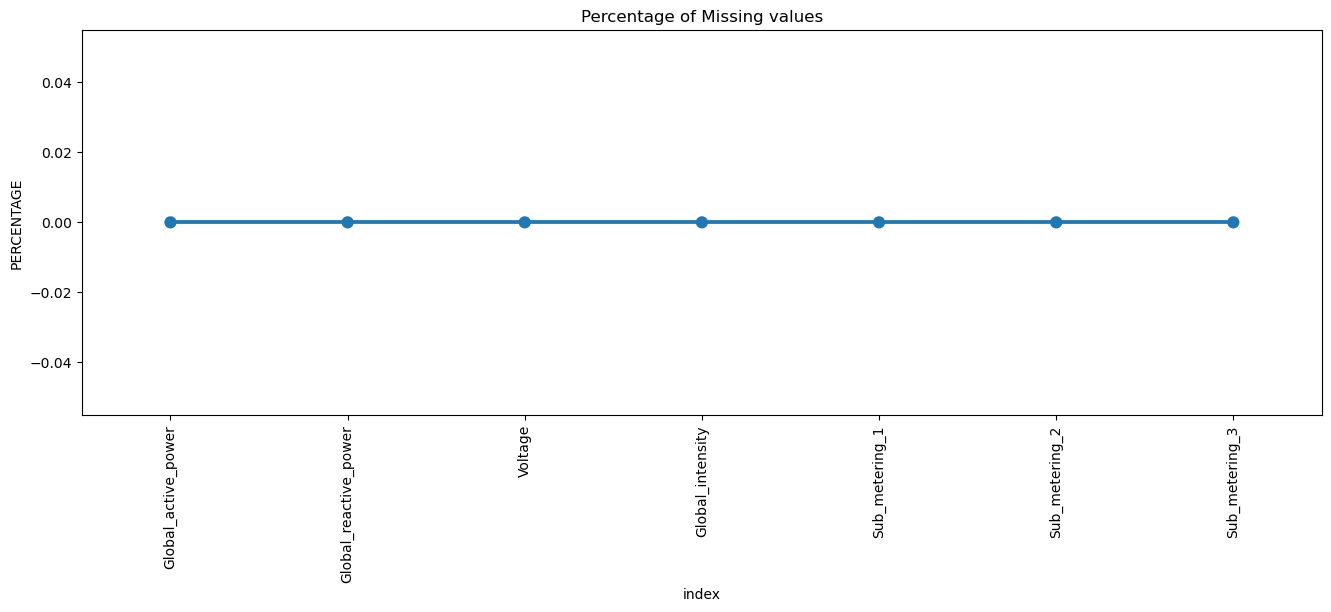

In [12]:
missing = pd.DataFrame((df_downsampled_cleaned.isnull().sum()) * 100 / df_downsampled_cleaned.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### checking for duplicates

In [13]:
df_downsampled_cleaned.duplicated().sum()

425

### Dropping the duplicates

In [14]:

df_downsampled_cleaned = df_downsampled_cleaned.drop_duplicates()

num_duplicates = df_downsampled_cleaned.duplicated().sum()
print(num_duplicates)


0


In [15]:
df_downsampled_cleaned.shape

(34164, 7)

# EDA & Feature Engineering

### Detecting outliers

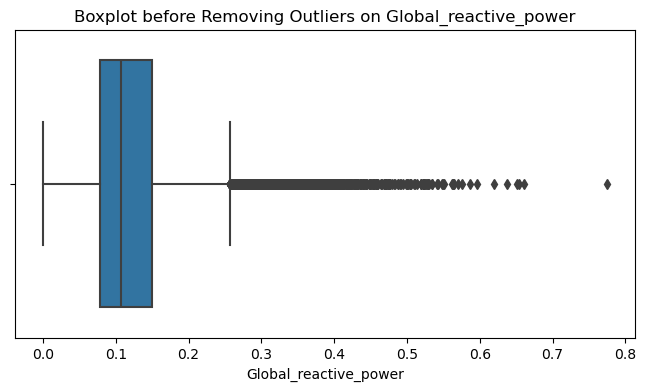

In [16]:

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_downsampled_cleaned['Global_reactive_power'])
plt.title('Boxplot before Removing Outliers on Global_reactive_power')
plt.show()

### Removing outliers

In [17]:
# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(data, k=1.5):
    # Calculate quartiles using numpy
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate lower and upper fences
    lower_fence = Q1 - k * IQR
    upper_fence = Q3 + k * IQR

    # Filter the data to remove outliers
    filtered_data = data[(data >= lower_fence) & (data <= upper_fence)]
    
    return pd.Series(filtered_data)

In [18]:
df_downsampled_cleaned.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [19]:
# Create a copy of the DataFrame
df_downsampled_cleaned_c = df_downsampled_cleaned.copy()

df_downsampled_cleaned_c['Global_active_power'] = remove_outliers(df_downsampled_cleaned_c['Global_active_power'])
df_downsampled_cleaned_c['Global_reactive_power'] = remove_outliers(df_downsampled_cleaned_c['Global_reactive_power'])
df_downsampled_cleaned_c['Voltage'] = remove_outliers(df_downsampled_cleaned_c['Voltage'])
df_downsampled_cleaned_c['Global_intensity'] = remove_outliers(df_downsampled_cleaned_c['Global_intensity'])


In [20]:
df_downsampled_cleaned_c.shape

(34164, 7)

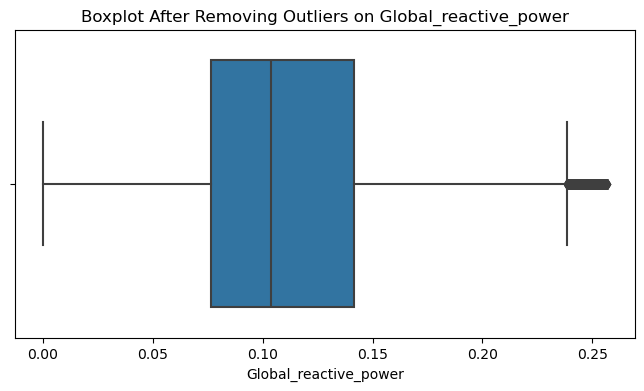

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_downsampled_cleaned_c['Global_reactive_power'])
plt.title('Boxplot After Removing Outliers on Global_reactive_power')
plt.show()

In [22]:
df_downsampled_cleaned_c = df_downsampled_cleaned_c.dropna()


In [23]:
df_downsampled_cleaned_c.shape

(31050, 7)

### Time Series Analysis

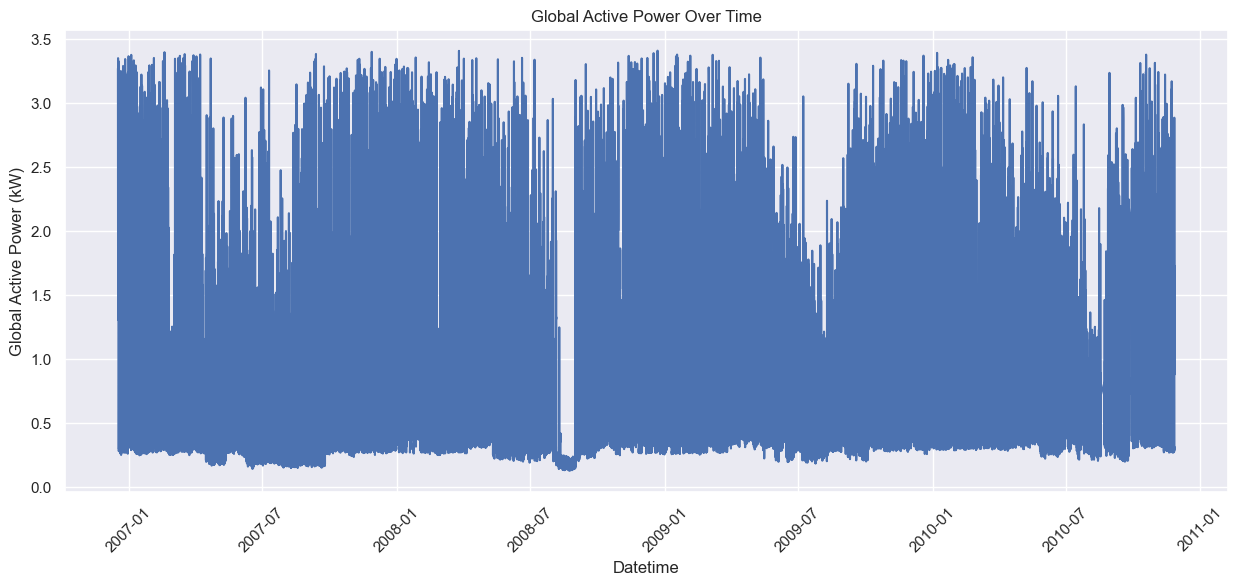

In [26]:
import warnings
# Filter out future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style of seaborn
sns.set(style="darkgrid")

# Create a figure and a set of subplots
plt.figure(figsize=(15, 6))

# Plotting
sns.lineplot(x=df_downsampled_cleaned_c.index, y='Global_active_power', data=df_downsampled_cleaned_c)

# Customizing the plot
plt.title('Global Active Power Over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=45) 

# Show the plot
plt.show()

### Insights

1. **Potential Seasonality:** The variations in power usage could indicate seasonality. For example, higher power usage might occur during colder months due to heating or during hotter months due to air conditioning.

2. **Regular Variation:** There is a clear pattern of regular variation, which could indicate a daily cycle of power usage, with peaks possibly corresponding to morning or evening when energy usage is typically higher.

3. **Consistent Baseline:** A consistent baseline level of power consumption is apparent, indicating a steady usage of electricity that could be associated with always-on devices or a minimum set of appliances regularly used in the household.

4. **Data Gaps:** There are some vertical gaps in the data where there appears to be no consumption recorded, or possibly missing data. It is important to investigate these gaps as they could affect the accuracy of my forecasting model.

## Filtering the data around October 2008

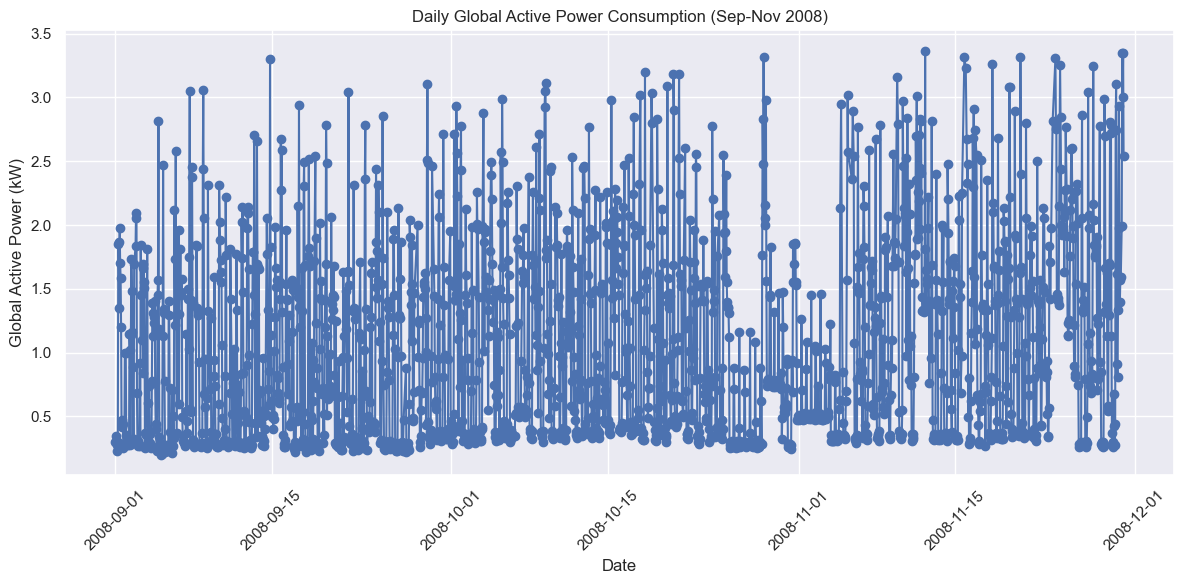

count    2039.000000
mean        1.053057
std         0.760294
min         0.198600
25%         0.366733
50%         0.801633
75%         1.556533
max         3.367367
Name: Global_active_power, dtype: float64


In [27]:


start_date = '2008-09-01'
end_date = '2008-11-30'
mask = (df_downsampled_cleaned_c.index > start_date) & (df_downsampled_cleaned_c.index <= end_date)
df_oct_2008 = df_downsampled_cleaned_c.loc[mask]

# Ploting the data for September to November 2008
plt.figure(figsize=(12, 6))
plt.plot(df_oct_2008.index, df_oct_2008['Global_active_power'], marker='o', linestyle='-')
plt.title('Daily Global Active Power Consumption (Sep-Nov 2008)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

# Calculate basic statistics for the period
stats = df_oct_2008['Global_active_power'].describe()
print(stats)

## Insights

1. **Intermittent Drops:** There are intermittent drops in power consumption, including a significant drop around late October. This could indicate occasional periods when less electricity is used, which may be due to the residents being away, certain appliances not being used, or possible data collection issues.

2. **Recovery After Drops:** After the notable drop in power consumption, the levels appear to recover back to the usual range. This suggests that the drop was a temporary event rather than a permanent change in consumption habits or system measurement changes.

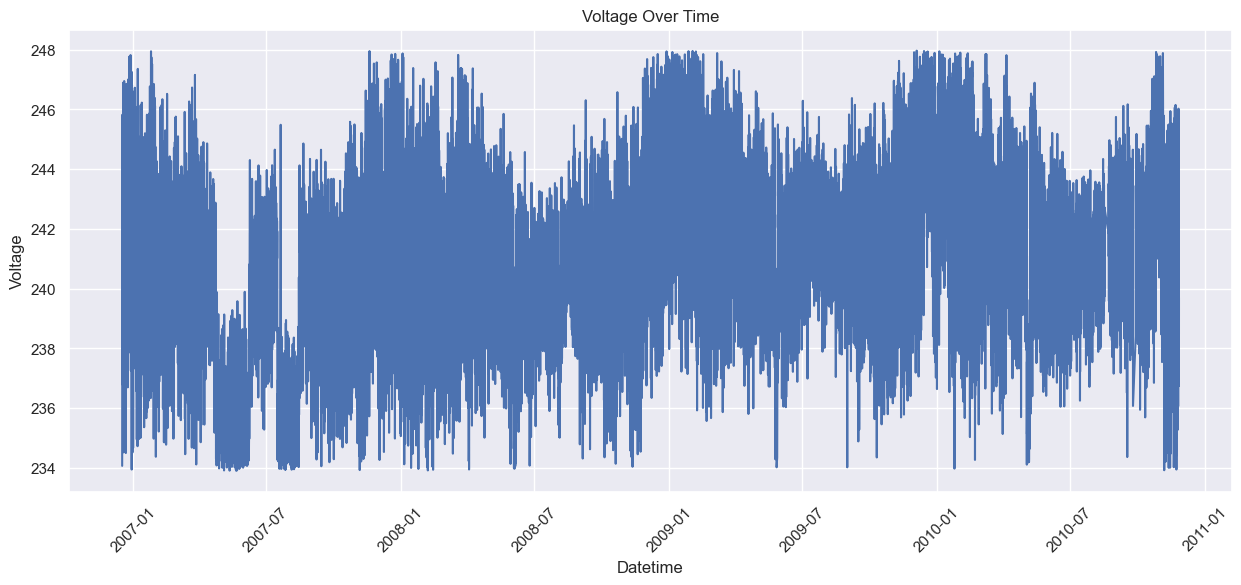

In [29]:
# Set the style of seaborn
sns.set(style="darkgrid")

# Create a figure and a set of subplots
plt.figure(figsize=(15, 6))

# Plotting
sns.lineplot(x=df_downsampled_cleaned_c.index, y='Voltage', data=df_downsampled_cleaned_c)

# Customizing the plot
plt.title('Voltage Over Time')
plt.xlabel('Datetime')
plt.ylabel('Voltage')
plt.xticks(rotation=45)  

# Show the plot
plt.show()

### Insights

1. **Stability of Voltage:** The voltage levels seem relatively stable over time, staying mostly within a narrow band. This indicates that the household receives a consistent voltage supply, without significant fluctuations that might indicate instability in the electrical grid or issues with the household's electrical infrastructure.

2. **Periodic Drops:** There are periodic drops in voltage observable in the plot. These could be due to heavy appliance usage at specific times, potential issues with the local grid, or data recording anomalies. The regularity of these drops could warrant further investigation into their cause, as consistent voltage drops could affect appliance performance and longevity.

3. **No Clear Seasonality:** Unlike power consumption, voltage does not appear to have a clear trend or seasonal pattern over the period shown. This lack of trend suggests that voltage is not influenced by the same factors that typically affect power consumption, such as increased use of heating or cooling systems. It might be more related to the conditions of the electrical grid and other technical factors.

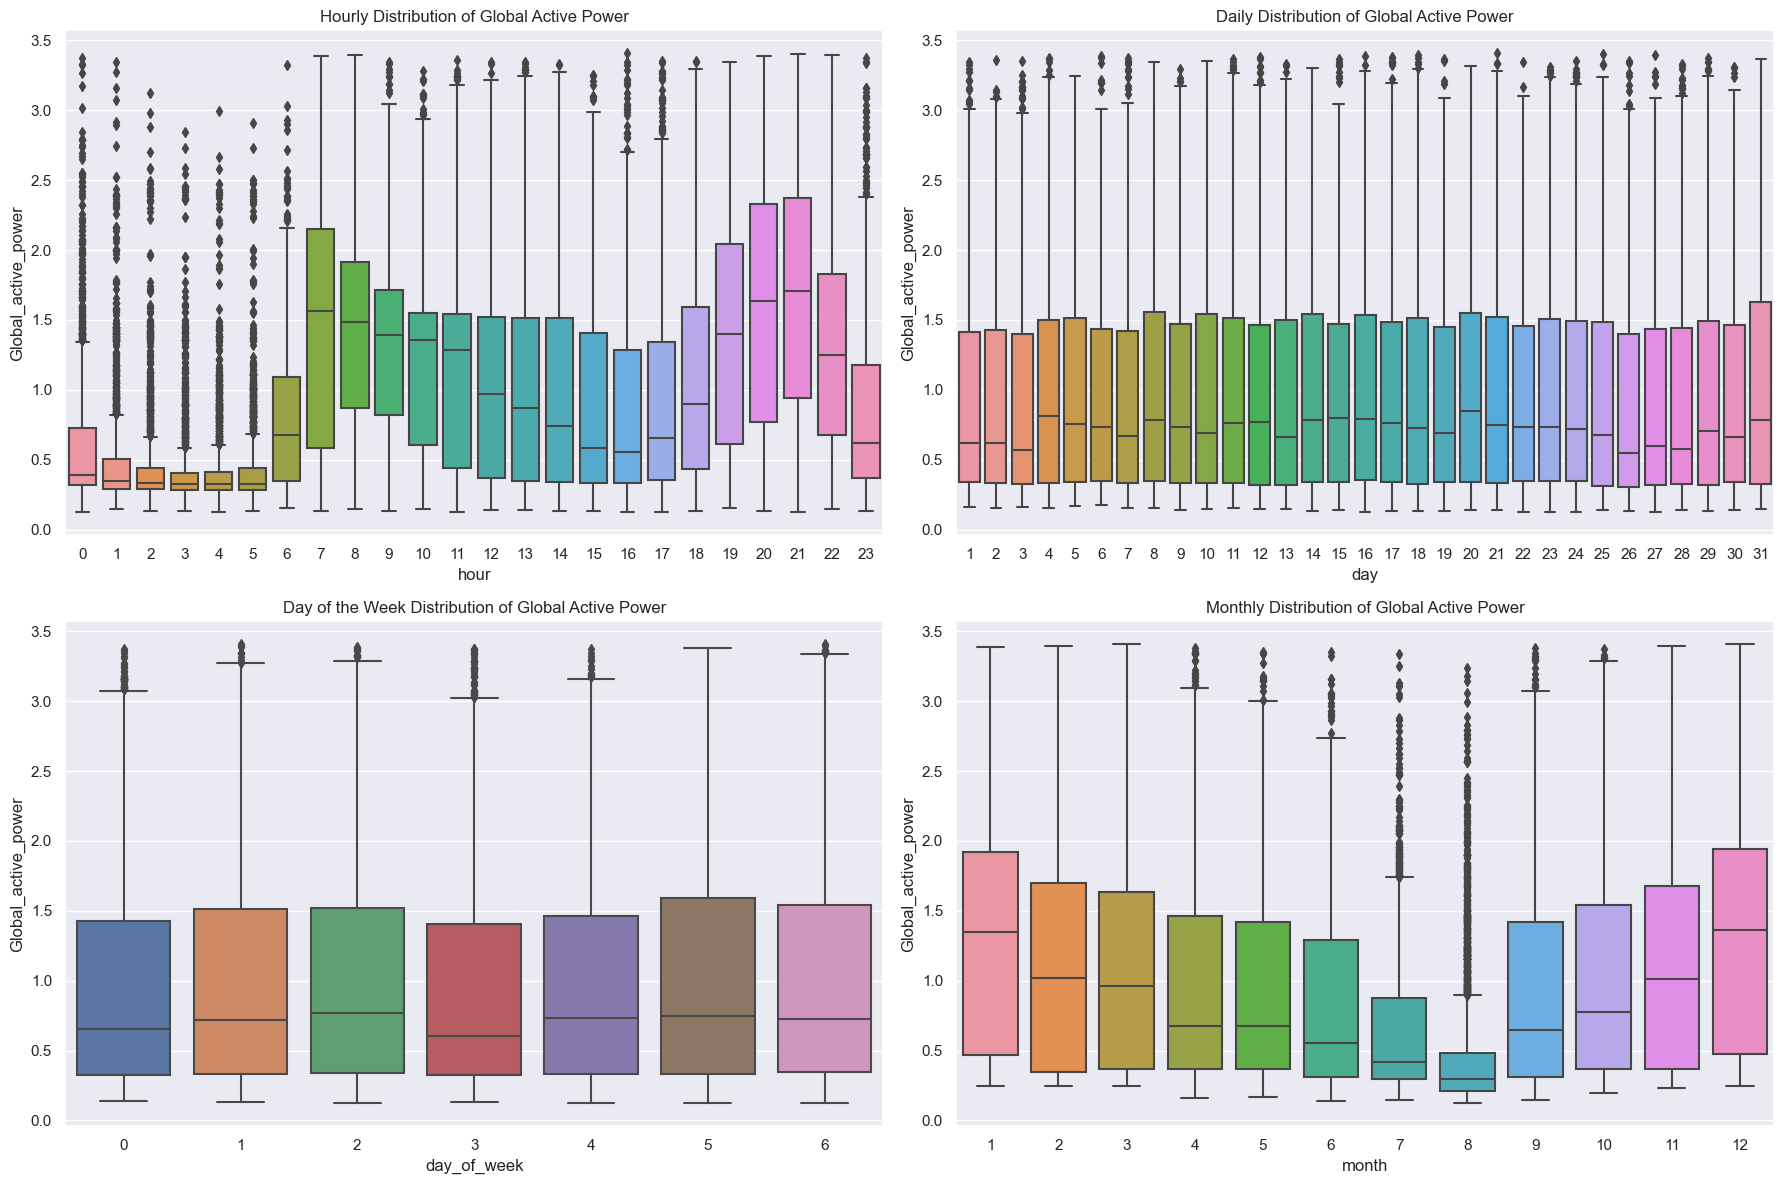

In [33]:
# Boxplot for daily, weekly, monthly distribution
df_downsampled_cleaned_c['hour'] = df_downsampled_cleaned_c.index.hour
df_downsampled_cleaned_c['day'] = df_downsampled_cleaned_c.index.day
df_downsampled_cleaned_c['day_of_week'] = df_downsampled_cleaned_c.index.dayofweek
df_downsampled_cleaned_c['month'] = df_downsampled_cleaned_c.index.month

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='hour', y='Global_active_power', data=df_downsampled_cleaned_c)
plt.title('Hourly Distribution of Global Active Power')

plt.subplot(2, 2, 2)
sns.boxplot(x='day', y='Global_active_power', data=df_downsampled_cleaned_c)
plt.title('Daily Distribution of Global Active Power')

plt.subplot(2, 2, 3)
sns.boxplot(x='day_of_week', y='Global_active_power', data=df_downsampled_cleaned_c)
plt.title('Day of the Week Distribution of Global Active Power')

plt.subplot(2, 2, 4)
sns.boxplot(x='month', y='Global_active_power', data=df_downsampled_cleaned_c)
plt.title('Monthly Distribution of Global Active Power')

plt.tight_layout()
plt.show()

### Insight

1. **Hourly Variation:** There is a clear pattern of power consumption across different hours of the day. Consumption is typically lower during the night and early morning hours (0-5) and peaks during the evening (around 18-21). This likely corresponds to routine human activity, where households consume more power during waking and active hours.

2. **Daily Consistency vs. Outliers:** The daily distribution shows consistent power usage across the days of the month, with a few outliers indicating days with unusually high consumption. These outliers could be due to specific events or activities requiring more power.

3. **Weekly Patterns:** Power consumption varies throughout the week, with the lowest median power usage appearing to be on Sunday (day 6) and higher usage in the middle of the week. This could reflect different weekly routines or a possible reduction in activity during the weekends.

4. **Monthly Trends:** The monthly distribution suggests variability in power usage throughout the year, with some months showing higher median consumption and greater spread (such as in winter or summer months) possibly due to heating and cooling needs, while other months have lower consumption (possibly milder months with less need for temperature regulation). There are also noticeable outliers in certain months, which could correspond to seasonal events or other factors influencing power usage.

### Correlation heatmap

In [32]:
# drop = ['hour', 'day', 'day_of_week','month']
# df_downsampled_cleaned_c.drop(columns=drop ,axis=1, inplace=True)

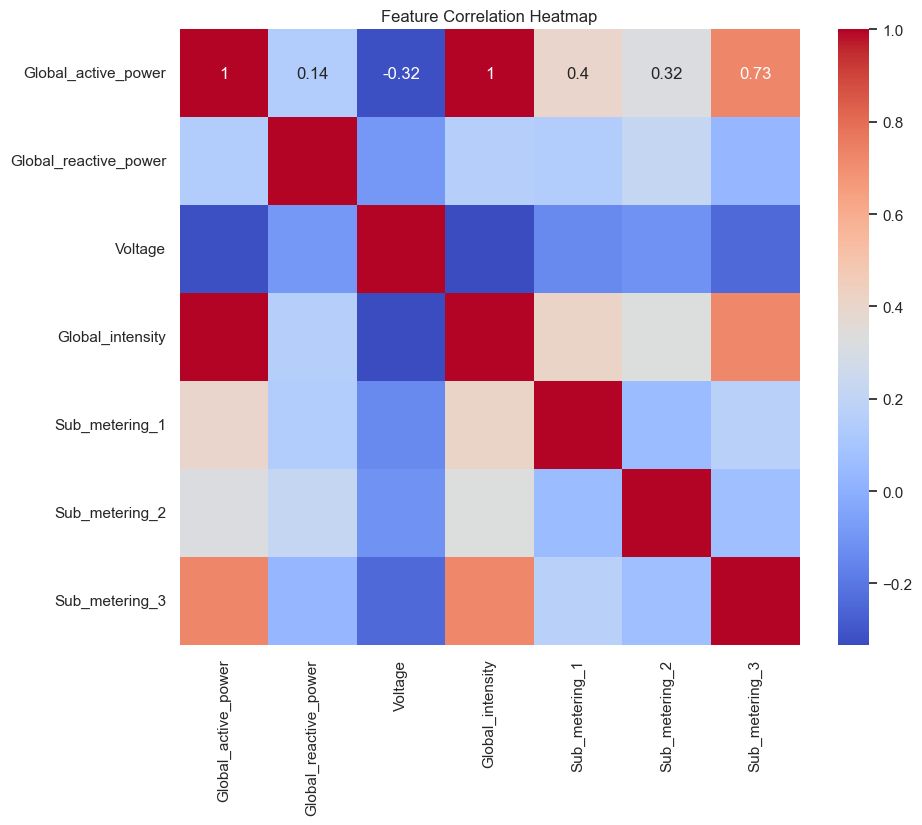

In [31]:


# Select only the numeric columns for the correlation matrix
numeric_df = df_downsampled_cleaned_c.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


### Insights

1. **Strong Correlation Between Global Intensity and Global Active Power:** There is a strong positive correlation between 'Global_intensity' and 'Global_active_power', which suggests that as the intensity of electricity usage increases, so does the active power consumption. This is logical since higher electrical intensity (current) typically means higher power usage.

2. **Moderate Correlation Between Sub_metering_3 and Global Active Power:** 'Sub_metering_3' seems to have a moderate positive correlation with 'Global_active_power'. This could imply that  water heater  contributes significantly to the overall power consumption in the household.

3. **Low Correlation Between Voltage and Other Features:** Voltage shows relatively low correlation with most of the other features. This might indicate that voltage fluctuations have little to no direct influence on the overall power consumption patterns in the dataset, or it could be relatively stable, not showing much variability to correlate with other variables.

4. **Reactive Power Shows Limited Relationship:** 'Global_reactive_power' has a low correlation with 'Global_active_power' and 'Global_intensity'. Reactive power, which is the power that oscillates between the source and load, doesn't increase proportionally with the active power or the intensity of the electricity use, which might indicate a relatively stable or efficient system where reactive power is managed or minimized.

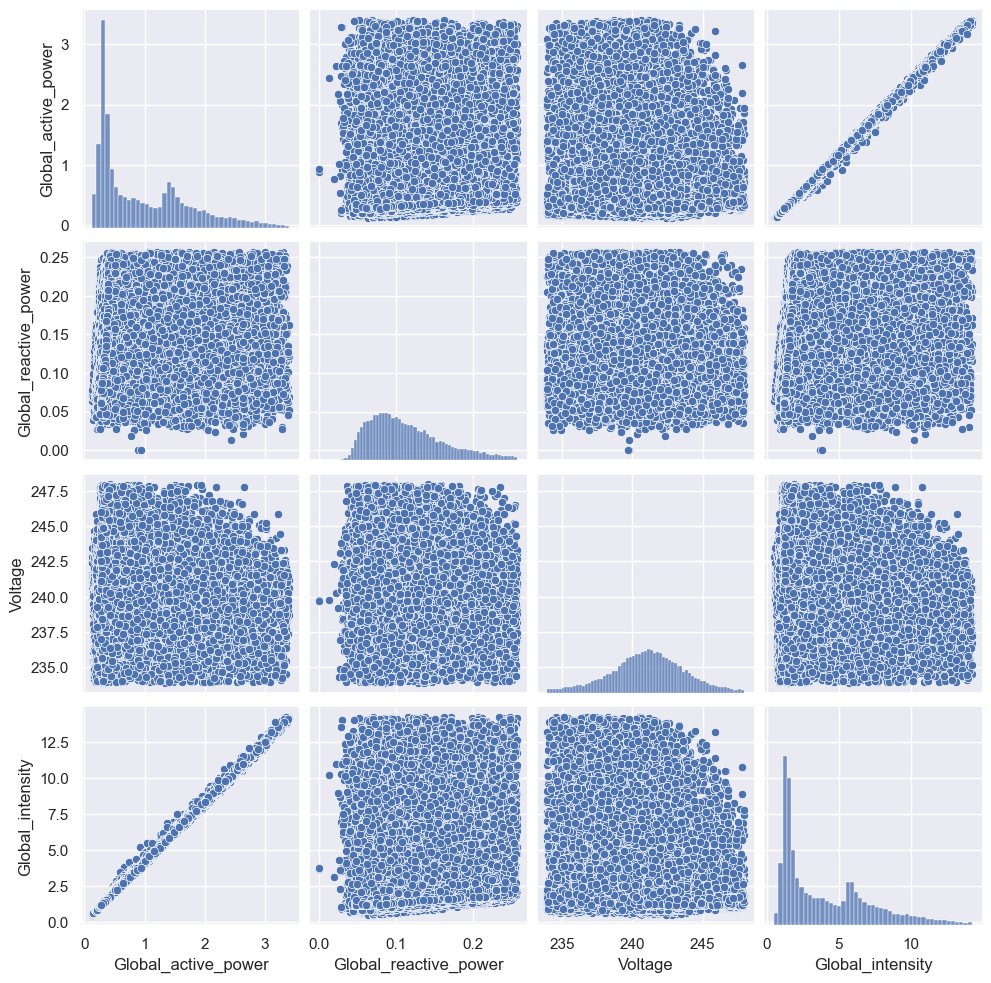

In [36]:
# Pairplot to explore the relationships between features
sns.pairplot(df_downsampled_cleaned_c, vars=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'])
plt.show()

### Insight

1. **Positive Linear Relationship:** There's a clear positive linear relationship between 'Global_active_power' and 'Global_intensity'. This is indicated by the scatter plot forming a line-like pattern, which suggests that as active power consumption increases, the intensity of electricity usage also increases proportionally.

2. **Distribution Characteristics:** The histograms on the diagonal show the distribution of each variable. 'Global_active_power' and 'Global_intensity' appear to have similar distribution shapes, which are skewed to the right, indicating a higher frequency of lower values with some larger values extending to the right.

3. **Voltage Stability:** The plots involving 'Voltage' show little to no clear pattern in relation to 'Global_active_power' and 'Global_intensity', suggesting that voltage levels remain relatively stable across different levels of power consumption and intensity.

4. **Reactive Power Behavior:** The relationship between 'Global_reactive_power' and other variables does not show a distinct pattern as seen with 'Global_active_power'. The scatter plots are more cloud-like, which indicates a more complex relationship that is not linear, or possibly that 'Global_reactive_power' is influenced by factors not included in the other variables plotted

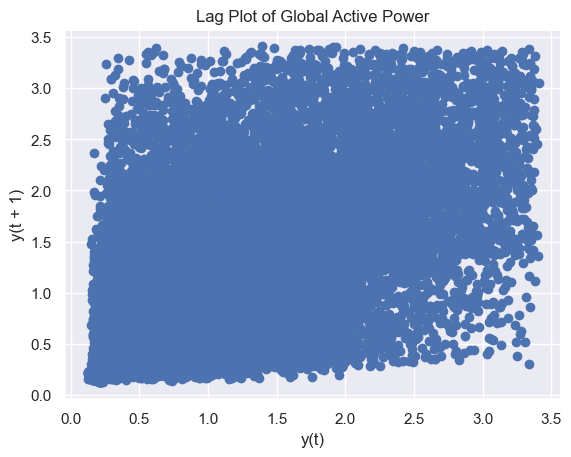

In [37]:
# Lag plot to observe serial correlation

pd.plotting.lag_plot(df_downsampled_cleaned_c['Global_active_power'])
plt.title('Lag Plot of Global Active Power')
plt.show()

### Decompose the  characteristics

In [38]:

!pip install statsmodels

In [42]:
# Forward fill
df_downsampled_cleaned_c.fillna(method='ffill', inplace=True)


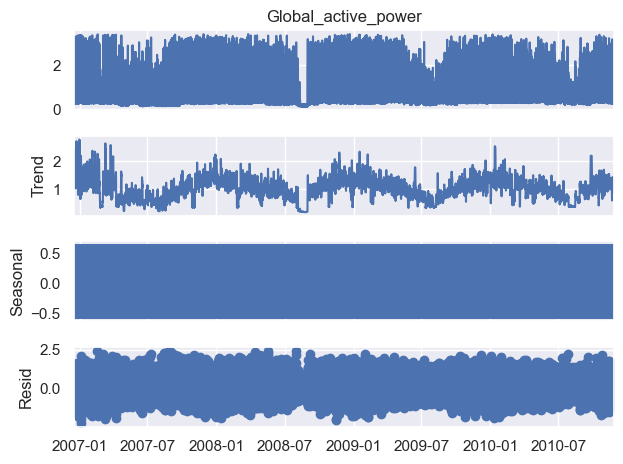

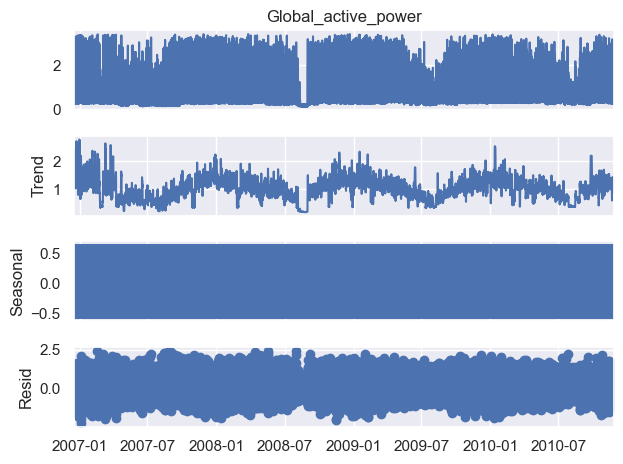

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_downsampled_cleaned_c = df_downsampled_cleaned_c.asfreq('H')
decompose_data =  seasonal_decompose(df_downsampled_cleaned_c['Global_active_power'],model = 'additive')

decompose_data.plot()

In [45]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(df_downsampled_cleaned_c['Global_active_power'])



1. H0: It is non-stationary.
2. H1: It is stationary.

In [49]:
def adfuller_test(Global_active_power):
    result = adfuller(Global_active_power)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")


In [52]:
adfuller_test(df_downsampled_cleaned_c['Global_active_power'])

ADF Test Statistic : -11.858561717659368
p-value : 6.93377621054429e-22
#Lags Used : 47
Number of Observations Used : 31002
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.


### Plot ACF and PACF

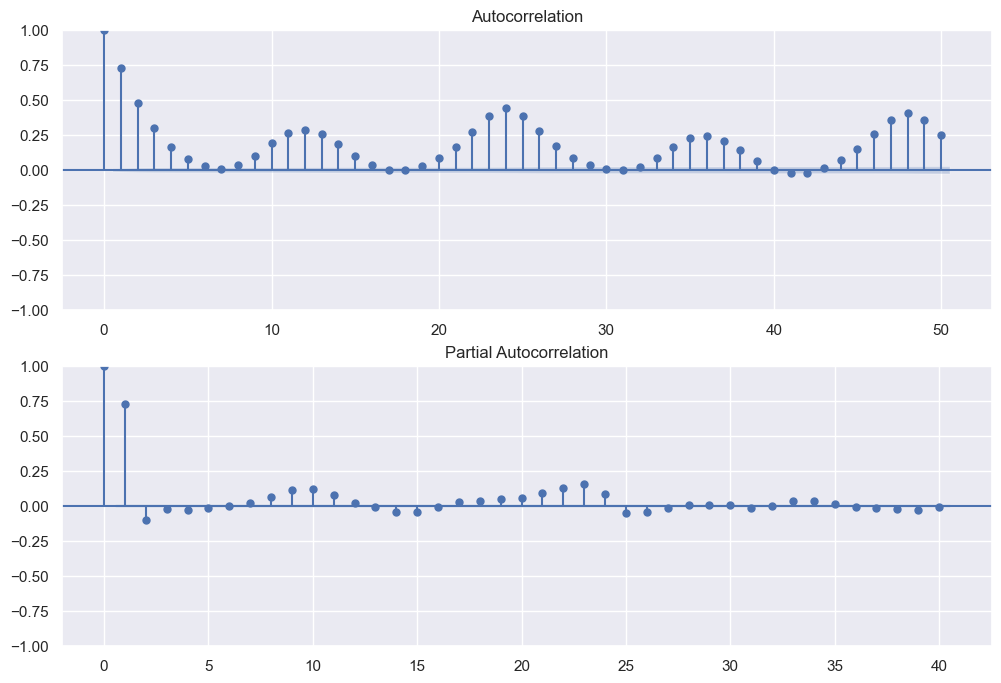

In [46]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot the ACF and PACF on the subplots
plot_acf(df_downsampled_cleaned_c['Global_active_power'], lags=50, ax=ax[0])
plot_pacf(df_downsampled_cleaned_c['Global_active_power'], lags=40, ax=ax[1])

plt.show()

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error



In [ ]:
import warnings
# Filter out future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Resample data to hourly frequency, filling missing values as needed
resampled_data = df_downsampled_cleaned_c.resample('H').mean().fillna(method='ffill')

# Extracting the target variable and exogenous variables
target = resampled_data['Global_active_power']
exog = resampled_data.drop(['Global_active_power', 'Voltage'], axis=1)  # This assumes other columns are exogenous variables

# Determine the order based on ACF and PACF plots and seasonality
p = 2 
d = 0  
q = 2  
P = 1  
D = 0  
Q = 1  
s = 24 

# Fit SARIMAX model with exogenous variables
model = SARIMAX(target, exog=exog, order=(p, d, q), seasonal_order=(P, D, Q, s))


sarimax_model = model.fit(maxiter=200, method='nm', disp=False)  # nm stands for Nelder-Mead


C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


n_test = int(len(resampled_data) * 0.2)  
train_target = target[:-n_test]
test_target = target[-n_test:]
train_exog = exog[:-n_test]
test_exog = exog[-n_test:]

# Refit the SARIMAX model on the training data
model = SARIMAX(train_target, exog=train_exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_model = model.fit(maxiter=200, method='nm', disp=False)

# Make predictions on the test set
predictions = sarimax_model.get_forecast(steps=n_test, exog=test_exog)
predicted_mean = predictions.predicted_mean

# Calculate errors
mae = mean_absolute_error(test_target, predicted_mean)
mse = mean_squared_error(test_target, predicted_mean)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 0.01491956428400498
Mean Squared Error (MSE): 0.00045511897464121963


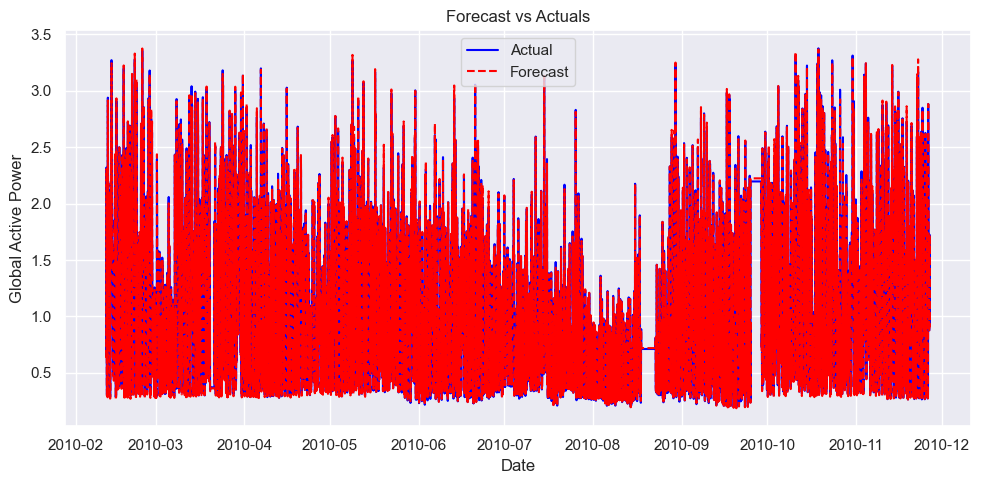

In [63]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_target.index, test_target, label='Actual', color='blue')
plt.plot(test_target.index, predicted_mean, label='Forecast', color='red', linestyle='--')

plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.tight_layout()
plt.show()


### Conclussion

1. Based on the Mean Absolute Error (MAE) and Mean Squared Error (MSE) , SARIMAX model seems to be performing quite well. The MAE of approximately 0.0149 indicates that, on average, the predictions are about 0.0149 units away from the actual values of 'Global_active_power'
2. MSE of approximately 0.000455 is very low, suggesting that there are no large errors in prediction; large errors would result in a much higher MSE due to the squaring of errors before they are averaged.